In [1]:
import numpy as np
import matplotlib.pyplot as plt
from memfunctions.mem import kernel_calculation, solve_MEM, solve_Tik, \
    solve_noreg, A2pdf
from memfunctions.plotting import plot_MEM, plot_Tik, plot_noreg
from memfunctions.distributions import norm_pdf

First, we create some sample data - a simple biexponential model function.

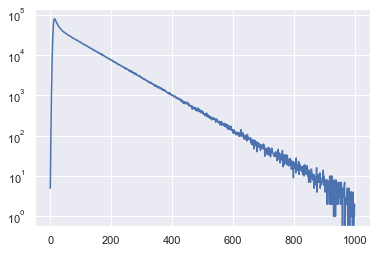

In [2]:
tau = (1, 10) # lifetime of 1 and 4 ns
amp = (0.5, 0.5) # equal weight
I0 = 1E5 # number of photons
t = np.linspace(0,100,1000) # time axis
model = np.zeros(t.shape)
for i in range(len(tau)):
    model += amp[i]*np.exp(-t/tau[i])
model *= I0
# convolute with Gaussian instrument response function
IRF = norm_pdf(t,1,0.25)
IRF /= np.sum(IRF)
model = np.convolve(IRF,model,'full')[:len(t)]
# add noise
model = np.random.poisson(model)
plt.semilogy(model)

Define the kernel function:

In [3]:
def kernel_function(x,tau,IRF,I0):
    return I0*np.convolve(IRF,np.exp(-x/tau),'full')[:len(x)]

Do the MEM analyis:

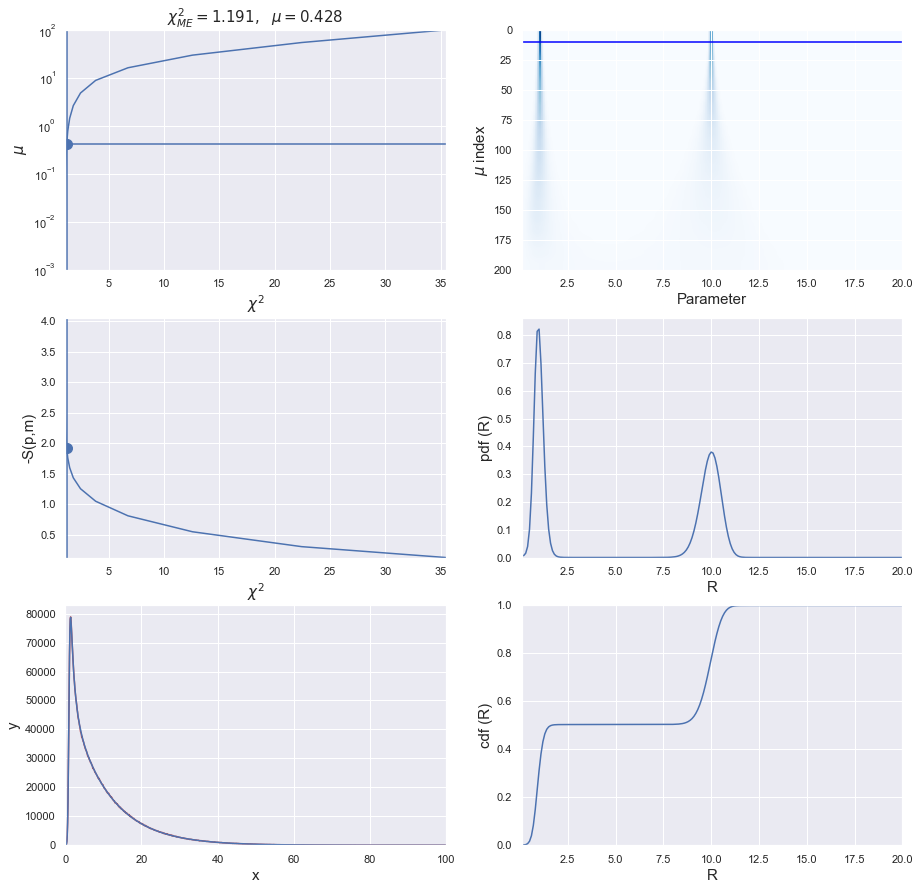

In [7]:
param_range = np.linspace(0.1,20,200)
# precalculations
F_R, param_range, mParam, c, q, H = kernel_calculation(t, model, lambda x : kernel_function(t,x,IRF,I0), param_range)
p, muRange, chiRange, SRange = solve_MEM(c,q,H,mParam,n_mu=20,mu_min=0.001,mu_max=1)
result = A2pdf(p,mParam,param_range)
plot_MEM(10,t,model,param_range,mParam,p,F_R,chiRange,muRange,SRange)

Using Tikhonov regularization:

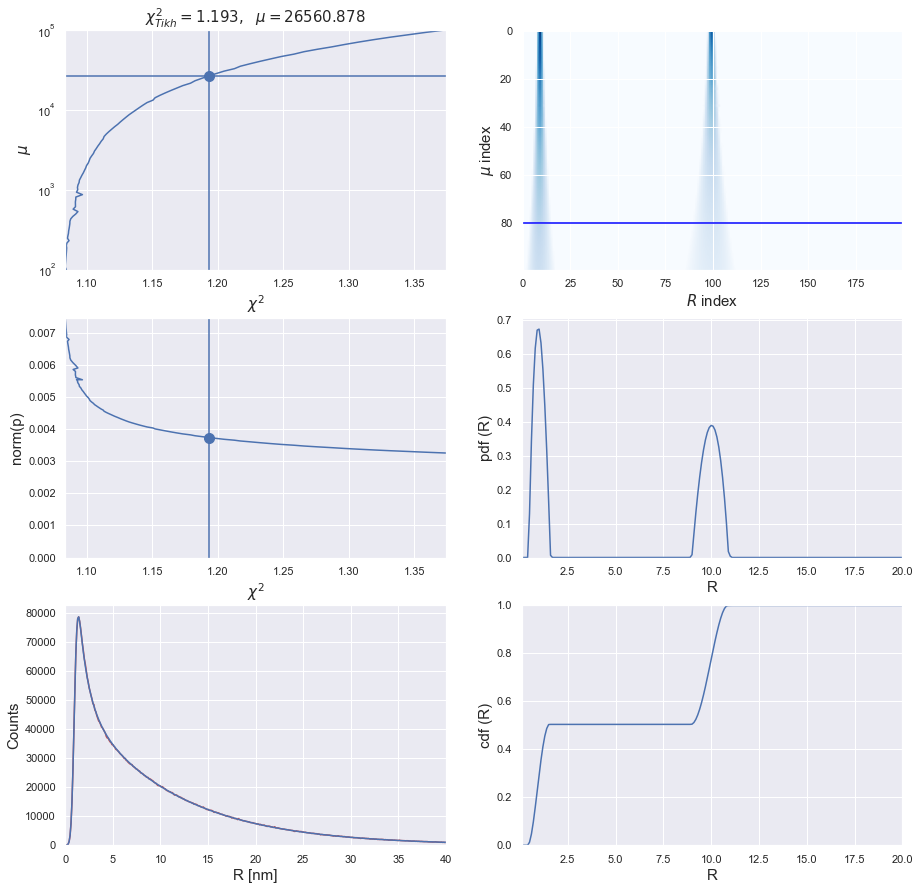

In [ ]:
param_range = np.linspace(0.1,20,200)
# precalculations
F_R, param_range, mParam, c, q, H = kernel_calculation(t, model, lambda x : kernel_function(t,x,IRF), param_range)
p, muRange, chiRange, SRange = solve_Tik(c,q,H,mu_min=100,mu_max=100000)
result = A2pdf(p,mParam,param_range)
plot_Tik(80,t,model,param_range,mParam,p,F_R,chiRange,muRange,SRange)

No regularization:

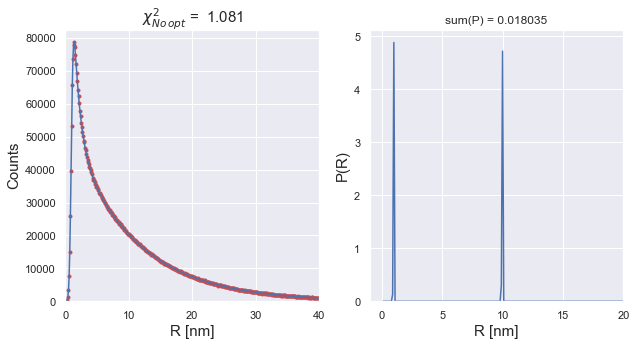

In [ ]:
param_range = np.linspace(0.1,20,200)
# precalculations
F_R, param_range, mParam, c, q, H = kernel_calculation(t, model, lambda x : kernel_function(t,x,IRF), param_range)
p, chi2 = solve_noreg(c,q,H)
result = A2pdf(p,mParam,param_range)
plot_noreg(t,model,F_R,param_range,mParam,p,chi2)